# Case Study 2 : Analyzing data from MovieLens

** Due Date: Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

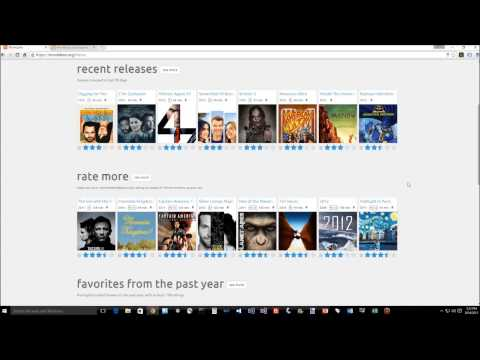

In [3]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

Zhenyu Hu

Ruochen Shi

Mengdi Li

Yenchang Hsieh

Rui Li

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [3]:


#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import pandas as pd
import numpy as np
import pprint as pp
column = ['MovieID','Title','Genres']
movie = pd.read_csv('movies.dat',sep='::',header=None, names=column, engine='python', encoding='latin_1')
column = ['UserID','MovieID','Rating','Timestamp']
rate = pd.read_csv('ratings.dat',sep='::', header=None, names=column, engine='python')
column = ['UserID','Gender','Age','Occupation','Zip-code']
user = pd.read_csv('users.dat',sep='::', header=None, names=column, engine='python')
data = pd.merge(movie,rate,on=['MovieID'])
data = pd.merge(data,user,on=['UserID'])
print('Complete merge')
print('moveis:',movie.shape)
print('user:',user.shape)
print('rate:',rate.shape)
print('total set:',data.shape)

# add a new column called year
year_series = [int(item.split('(')[-1].split(')')[0]) for item in data['Title']]
data['Year'] = year_series
store = pd.HDFStore('data.h5')
store['data'] = data
print(store['data'])

Complete merge
moveis: (3883, 3)
user: (6040, 5)
rate: (1000209, 4)
total set: (1000209, 10)
         MovieID                                              Title  \
0              1                                   Toy Story (1995)   
1             48                                  Pocahontas (1995)   
2            150                                   Apollo 13 (1995)   
3            260          Star Wars: Episode IV - A New Hope (1977)   
4            527                            Schindler's List (1993)   
5            531                          Secret Garden, The (1993)   
6            588                                     Aladdin (1992)   
7            594             Snow White and the Seven Dwarfs (1937)   
8            595                        Beauty and the Beast (1991)   
9            608                                       Fargo (1996)   
10           661                   James and the Giant Peach (1996)   
11           720  Wallace & Gromit: The Best of Aardman

In [5]:
# How many movies have an average rating over 4.5 overall?

grouped = data.groupby('Title')
rating = grouped['Rating'].aggregate(np.mean)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [11]:
# How many movies have an average rating over 4.5 among men?

male_data = data[data.Gender != 'F']
grouped = male_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.mean)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Angela (1995)                                                          5.000000
Small Wonders (1996)                                                   5.000000
Baby, The (1973)                                                       5.000000
Smashing Time (1967)                                                   5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Dangerous Game (1993)                                                  5.000000
Bells, The (1926)                                                      5.000000
Time of the Gypsies (Dom za vesanje) (1989)                            4.833333
I Am Cuba (Soy Cuba/Ya Kuba) (1964

In [12]:
# How about women?

female_data = data[data.Gender != 'M']
grouped = female_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.mean)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
Lamerica (1994)                                            5.000000
Brother, Can You Spare a Dime? (1975)                      5.000000
Other Side of Sunday, The (Søndagsengler) (1996)           5.000000
Ayn Rand: A Sense of Life (1997)                           5.000000
For the Moment (1994)                                      5.000000
Country Life (1994)                                        5.000000
Belly (1998)                                               5.000000
Clean Slate (Coup de Torchon) (1981)                       5.000000
Woman of Paris, A (1923)                                   5.000000
Coldblooded (1995)                                         5.000000
Ballad of Narayama, The (Narayama Bushiko) (1958)          5.000000
Skipped Parts (2000)                                       5.000000
Message to Love: The Isle of Wight Festival (1996)         5.000000
Saltmen of Tibet, The (1997)                               5.000000
Dancemaker (1998)                         

In [13]:
# How many movies have an median rating over 4.5 among men over age 30? 

male_data = data[data.Gender != 'F']
male_data = male_data[male_data.Age > 30]
grouped = male_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.median)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
City Lights (1931)                                                             5.0
Usual Suspects, The (1995)                                                     5.0
It's a Wonderful Life (1946)                                                   5.0
Time of the Gypsies (Dom za vesanje) (1989)                                    5.0
Citizen Kane (1941)                                                            5.0
Hearts and Minds (1996)                                                        5.0
Wallace & Gromit: The Best of Aardman Animation (1996)                         5.0
Silence of the Lambs, The (1991)                                               5.0
Godfather, The (1972)                                                          5.0
Godfather: Part II, The (1974)                                                 5.0
Chushingura (1962)                                                             5.0
Among Giants (1998)                                                            5.

In [14]:
# How about women over age 30?

female_data = data[data.Gender != 'M']
female_data = female_data[female_data.Age > 30]
grouped = female_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.median)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x] > 4.5)
print('Total:',len(rating))

Total: 149


In [15]:
# What are the ten most popular movies?
# Choose what you consider to be a reasonable defintion of "popular".
# Be perpared to defend this choice.

# Popular: How many people watched the movie
movie_watch_count = data.groupby('Title')['UserID'].nunique()
movie_watch_count = movie_watch_count.sort_values(ascending=False)
print(movie_watch_count)


Title
American Beauty (1999)                                                   3428
Star Wars: Episode IV - A New Hope (1977)                                2991
Star Wars: Episode V - The Empire Strikes Back (1980)                    2990
Star Wars: Episode VI - Return of the Jedi (1983)                        2883
Jurassic Park (1993)                                                     2672
Saving Private Ryan (1998)                                               2653
Terminator 2: Judgment Day (1991)                                        2649
Matrix, The (1999)                                                       2590
Back to the Future (1985)                                                2583
Silence of the Lambs, The (1991)                                         2578
Men in Black (1997)                                                      2538
Raiders of the Lost Ark (1981)                                           2514
Fargo (1996)                                              

  Gender    Rating       std
0      F  3.620366  1.111228
1      M  3.568879  1.118724


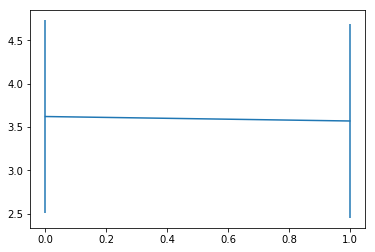

    Occupation    Rating       std
13          13  3.781736  1.037604
15          15  3.689774  1.066078
6            6  3.661578  1.109623
9            9  3.656589  1.033470
3            3  3.656516  1.097272


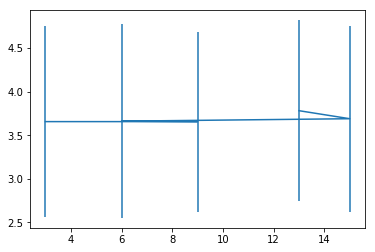

In [29]:
# Make some conjectures about how easy various groups are to please? Support your answers with data!
# For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children. 
# This conjecture may or may not be true,but how would you support or disprove either conclusion with with data?
# Be sure to come up with your own conjectures and support them with data!
#1.Compared with males, females are easier to please since they are more emotional.
#2.The retired people are the easiest group to please since they are generally peaceful and do not want to mean to something. The reason they watch movie is just to kill time.


import matplotlib.pyplot as plt

occupation_rating = data.groupby(['Gender'])['Rating'].mean().reset_index()
occupation_std = data.groupby(['Gender'])['Rating'].std().reset_index()
occupation_std = occupation_std.rename(columns={'Rating':'std'}) 
occupation_data = pd.merge(occupation_rating,occupation_std,on=['Gender'])
occupation_data = occupation_data.sort_values(by=['Rating'], ascending=[False])

occupation_data = occupation_data[:2]
print(occupation_data)
plt.errorbar(occupation_data.index, occupation_data['Rating'], yerr=occupation_data['std'])
plt.show()

occupation_rating = data.groupby(['Occupation'])['Rating'].mean().reset_index()
occupation_std = data.groupby(['Occupation'])['Rating'].std().reset_index()
occupation_std = occupation_std.rename(columns={'Rating':'std'}) 
occupation_data = pd.merge(occupation_rating,occupation_std,on=['Occupation'])
occupation_data = occupation_data.sort_values(by=['Rating'], ascending=[False])

occupation_data = occupation_data[:5]
print(occupation_data)
plt.errorbar(occupation_data.index, occupation_data['Rating'], yerr=occupation_data['std'])
plt.show()



# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

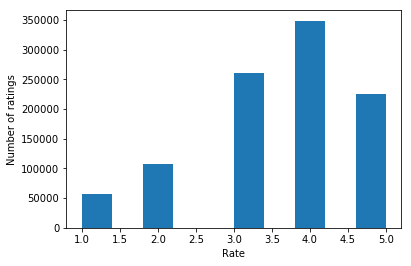

In [10]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import matplotlib.pyplot as plt
#Plot a histogram of the ratings of all movies.

plt.hist(data.Rating)
plt.xlabel('Rate')
plt.ylabel('Number of ratings')
plt.show()

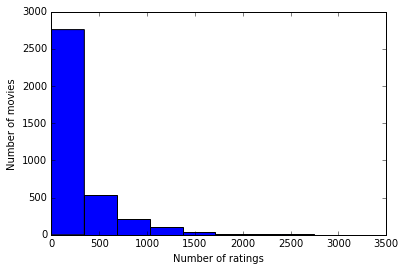

In [11]:
#Plot a histogram of the number of ratings each movie recieved.

number_rate = data.groupby('Title').size()
plt.hist(number_rate)
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

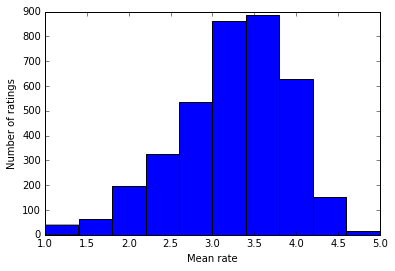

In [12]:
#Plot a histogram of the average rating for each movie.

group_rate = data.groupby('Title')
mean_rate = group_rate['Rating'].aggregate(np.mean)
plt.hist(mean_rate)
plt.xlabel('Mean rate')
plt.ylabel('Number of ratings')
plt.show()

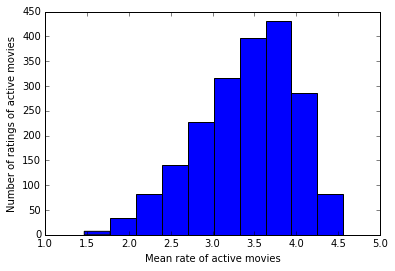

In [13]:
#Plot a histogram of the average rating for movies which are rated more than 100 times.

active_titles = number_rate.index[number_rate > 100]
mean_active_rate = mean_rate.loc[active_titles]
plt.hist(mean_active_rate)
plt.xlabel('Mean rate of active movies')
plt.ylabel('Number of ratings of active movies')
plt.show()

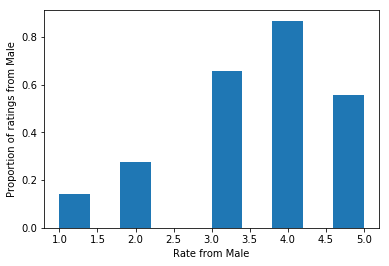

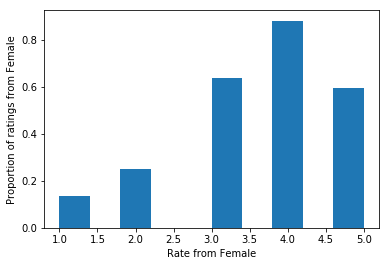

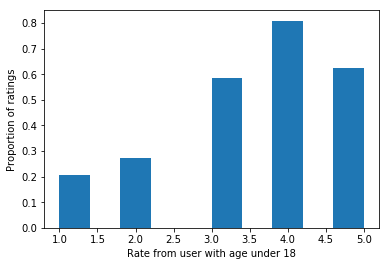

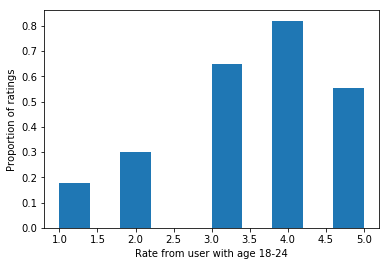

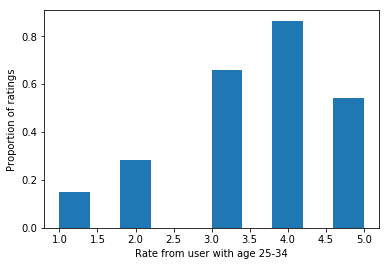

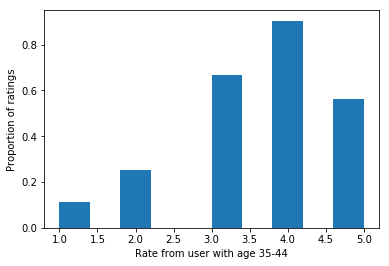

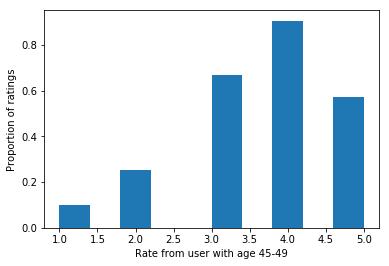

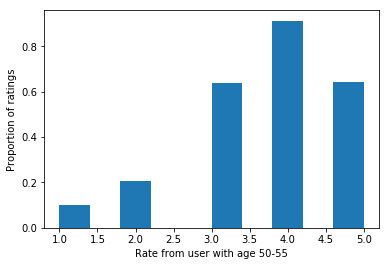

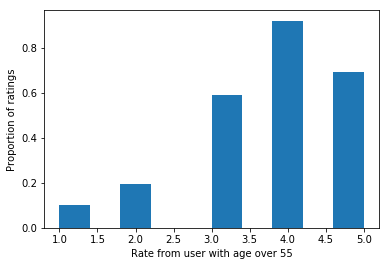

In [60]:
# Make some conjectures about the distribution of ratings? Support your answers with data!
# For example, what age range do you think has more extreme ratings? 
# Do you think children are more or less likely to rate a movie 1 or 5?
# Be sure to come up with your own conjectures and support them with data!

plt.hist(data[data.Gender == 'M'].Rating, normed=1)
plt.xlabel('Rate from Male')
plt.ylabel('Proportion of ratings from Male')
plt.show()

plt.hist(data[data.Gender == 'F'].Rating, normed=1)
plt.xlabel('Rate from Female')
plt.ylabel('Proportion of ratings from Female')
plt.show()


plt.hist(data[data.Age == 1].Rating, normed=1)
plt.xlabel('Rate from user with age under 18')
plt.ylabel('Proportion of ratings')
plt.show()

plt.hist(data[data.Age == 18].Rating, normed=1)
plt.xlabel('Rate from user with age 18-24')
plt.ylabel('Proportion of ratings')
plt.show()

plt.hist(data[data.Age == 25].Rating, normed=1)
plt.xlabel('Rate from user with age 25-34')
plt.ylabel('Proportion of ratings')
plt.show()

plt.hist(data[data.Age == 35].Rating, normed=1)
plt.xlabel('Rate from user with age 35-44')
plt.ylabel('Proportion of ratings')
plt.show()

plt.hist(data[data.Age == 45].Rating, normed=1)
plt.xlabel('Rate from user with age 45-49')
plt.ylabel('Proportion of ratings')
plt.show()

plt.hist(data[data.Age == 50].Rating, normed=1)
plt.xlabel('Rate from user with age 50-55')
plt.ylabel('Proportion of ratings')
plt.show()

plt.hist(data[data.Age == 56].Rating, normed=1)
plt.xlabel('Rate from user with age over 55')
plt.ylabel('Proportion of ratings')
plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

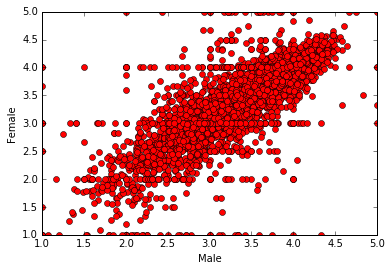

In [15]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

#Make a scatter plot of men versus women and their mean rating for every movie.
import matplotlib.pyplot as plt
mean_ratings = data.pivot_table('Rating',index='MovieID',columns='Gender', aggfunc='mean')
tm = list(mean_ratings['M'].values) 
tf = list(mean_ratings['F'].values)
plt.xlabel('Male')
plt.ylabel('Female')
plt.plot(tm, tf,'ro')
plt.show()

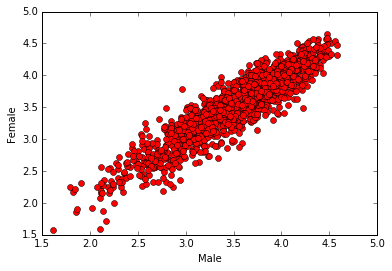

In [16]:
#Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.

ratings_by_title = data.groupby('MovieID').size()
active_titles = ratings_by_title.index[ratings_by_title > 200]
sub_mean_ratings = mean_ratings.loc[active_titles]
sub_tm = list(sub_mean_ratings['M'].values) 
sub_tf = list(sub_mean_ratings['F'].values) 
plt.xlabel('Male')
plt.ylabel('Female')
plt.plot(sub_tm, sub_tf,'ro')
plt.show()

In [17]:
#Compute the correlation coefficent between the ratings of men and women.


print ('Correlation for all men and women: \n',mean_ratings.corr())
print ('\nCorrelation for men and women whose rating more than 200 times: \n',sub_mean_ratings.corr())

Correlation for all men and women: 
 Gender        F        M
Gender                  
F       1.00000  0.76319
M       0.76319  1.00000

Correlation for men and women whose rating more than 200 times: 
 Gender         F         M
Gender                    
F       1.000000  0.918361
M       0.918361  1.000000


In [39]:
# Conjecture under what circumstances the rating given by one gender can be used to predict 
# the rating given by the other gender.
# For example, are men and women more similar when they are younger or older?
# Be sure to come up with your own conjectures and support them with data!


In [68]:
occupations = data['Occupation'].unique()
occupations.sort()


for i in occupations:
    occu_data = data[data.Occupation == i]
    occu_mean_data = occu_data.pivot_table('Rating',index='MovieID',columns='Gender', aggfunc='mean')
    print('Occupation: %d'%(i))
    print(occu_mean_data.corr())

Occupation: 0
Gender         F         M
Gender                    
F       1.000000  0.578786
M       0.578786  1.000000
Occupation: 1
Gender         F         M
Gender                    
F       1.000000  0.636358
M       0.636358  1.000000
Occupation: 2
Gender         F         M
Gender                    
F       1.000000  0.472414
M       0.472414  1.000000
Occupation: 3
Gender         F         M
Gender                    
F       1.000000  0.438775
M       0.438775  1.000000
Occupation: 4
Gender         F         M
Gender                    
F       1.000000  0.572648
M       0.572648  1.000000
Occupation: 5
Gender        F        M
Gender                  
F       1.00000  0.32981
M       0.32981  1.00000
Occupation: 6
Gender         F         M
Gender                    
F       1.000000  0.518479
M       0.518479  1.000000
Occupation: 7
Gender         F         M
Gender                    
F       1.000000  0.572696
M       0.572696  1.000000
Occupation: 8
Gender         F  

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

In [ ]:
import sys
import math
from texttable import Texttable


def getUserScoreDataStructure(rates):
    userDict = {}
    itemUser = {}
    for k in rates:
        user_rank = (k[1], k[2])
        if k[0] in userDict:
            userDict[k[0]].append(user_rank)
        else:
            userDict[k[0]] = [user_rank]

        if k[1] in itemUser:
            itemUser[k[1]].append(k[0])
        else:
            itemUser[k[1]] = [k[0]]
    return userDict, itemUser

def getNearestNeighbor(userId, userDict, itemUser):
    neighbors = []
    for item in userDict[userId]:
        for neighbor in itemUser[item[0]]:
            if neighbor != userId and neighbor not in neighbors:
                neighbors.append(neighbor)
    neighbors_dist = []
    for neighbor in neighbors:
        dist = getCosDist(userDict[userId], userDict[neighbor])
        neighbors_dist.append([dist, neighbor])
    neighbors_dist.sort(reverse = True)
    return neighbors_dist

def getCosDist(user1, user2):
    sum_x = 0.0
    sum_y = 0.0
    sum_xy = 0.0
    for key1 in user1:
        for key2 in user2:
            if key1[0] == key2[0]:
                sum_x += key1[1] * key1[1]
                sum_y += key2[1] * key2[1]
                sum_xy += key1[1] * key2[1]
    if sum_xy == 0.0:
        return 0
    demo = math.sqrt(sum_x * sum_y)
    return sum_xy / demo

def recommendByUserFC(userId, k = 5):
    rates = rate.values.tolist()

    userDict, itemUser = getUserScoreDataStructure(rates)

    neighbors = getNearestNeighbor(userId, userDict, itemUser)[:5]

    recommand_dict = {}
    for neighbor in neighbors:
        neighbor_user_id = neighbor[1]
        movies = userDict[neighbor_user_id]
        for movie in movies:
            if movie[0] not in recommand_dict:
                recommand_dict[movie[0]] = neighbor[0]
            else:
                recommand_dict[movie[0]] += neighbor[0]

    recommand_list = []
    for key in recommand_dict:
        recommand_list.append([recommand_dict[key], key])
    recommand_list.sort(reverse = True)
    user_movies = [k[0] for k in userDict[userId]]
    return [k[1] for k in recommand_list], user_movies, itemUser, neighbors

def getMovies(fn):
    contents = readFile(fn)
    movies_info = {}
    for movie in contents:
        single_info = movie.split('::')
        movies_info[int(single_info[0])] = single_info[1:]
    return movies_info

movies = movie.values.tolist()
recommend_list, user_movie, items_movie, neighbors = recommendByUserFC(20,30)
neighbors_id=[ i[1] for i in neighbors]
table = Texttable()
table.set_deco(Texttable.HEADER)
table.set_cols_dtype(['t', 't'])
table.set_cols_align(["l", "l"])
rows=[]
rows.append([u"movie name",u"release"])
for movie_id in recommend_list[:20]:
    from_user=[]
    for user_id in items_movie[movie_id]:
        if user_id in neighbors_id:
            from_user.append(user_id)
    rows.append([movies[movie_id][0],movies[movie_id][1]])
table.add_rows(rows)
print(table.draw())




In [12]:
split_data = data
split_data = split_data['Genres'].str.split('|', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'Genres'}).join(data.drop('Genres',1), how='left')
rating_data = split_data.groupby(['Genres'])['Rating'].size().reset_index()

print(rating_data)

         Genres  Rating
0        Action  257457
1     Adventure  133953
2     Animation   43293
3    Children's   72186
4        Comedy  356580
5         Crime   79541
6   Documentary    7910
7         Drama  354529
8       Fantasy   36301
9     Film-Noir   18261
10       Horror   76386
11      Musical   41533
12      Mystery   40178
13      Romance  147523
14       Sci-Fi  157294
15     Thriller  189680
16          War   68527
17      Western   20683


In [154]:
split_data = data['Genres'].str.split('|', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'Genres'}).join(data.drop('Genres',1), how='left')
genres_data = split_data.groupby(['Genres','Gender'])['Rating'].mean().reset_index()
male_data = genres_data[genres_data.Gender == 'M']
female_data = genres_data[genres_data.Gender == 'F']
gender_data = pd.merge(male_data,female_data,on=['Genres'],suffixes=('_M', '_F'))
gender_data['diff'] = abs(gender_data['Rating_M']-gender_data['Rating_F'])
gender_data = gender_data.sort_values('diff', ascending=False)

pd.pivot_table(gender_data, index=['Genres'], values=['Rating_M','Rating_F','diff'])


,Rating_F,Rating_M,diff
Genres,,,
Action,3.490252,3.491386,0.001134
Adventure,3.512879,3.468125,0.044753
Animation,3.744702,3.661335,0.083367
Children's,3.572548,3.358961,0.213586
Comedy,3.571938,3.503667,0.068271
Crime,3.689332,3.713720,0.024388
Documentary,3.946392,3.928811,0.017581
Drama,3.765662,3.766589,0.000927
Fantasy,3.513076,3.426603,0.086473


In [7]:
action_data = data[data['Genres'].str.contains('Action')]
genres_data = action_data.groupby(['Genres','Gender'])['Rating'].mean().reset_index()
male_data = genres_data[genres_data.Gender == 'M']
female_data = genres_data[genres_data.Gender == 'F']
gender_data = pd.merge(male_data,female_data,on=['Genres'],suffixes=('_M', '_F'))
gender_data['diff'] = abs(gender_data['Rating_M']-gender_data['Rating_F'])
gender_data = gender_data.sort_values('diff', ascending=True)[:40]
data_pivot = pd.pivot_table(gender_data, index=['Genres'], values=['Rating_M','Rating_F','diff'])
data_pivot = data_pivot.reindex(data_pivot['diff'].sort_values(ascending=True).index)
print(data_pivot)

greater_data_pivot = data_pivot[(data_pivot.Rating_F > 3.5) & (data_pivot.Rating_M > 3.5)]
print(greater_data_pivot)

less_data_pivot = data_pivot[(data_pivot.Rating_F < 3) & (data_pivot.Rating_M < 3)]
print(less_data_pivot)

                                      Rating_F  Rating_M      diff
Genres                                                            
Action|War                            3.000000  3.003206  0.003206
Action|Crime|Romance                  3.981419  3.972896  0.008523
Action|Comedy|Drama                   3.606684  3.594928  0.011756
Action                                3.367474  3.352991  0.014483
Action|Adventure|Crime|Thriller       2.800000  2.781095  0.018905
Action|Thriller                       3.510352  3.529345  0.018993
Action|Adventure|Crime                2.942238  2.922397  0.019841
Action|Sci-Fi                         3.195568  3.217363  0.021794
Action|Romance|War                    3.795556  3.818667  0.023111
Action|Adventure|Drama                3.249180  3.274290  0.025110
Action|Adventure|Sci-Fi|Thriller|War  2.904762  2.933086  0.028324
Action|Adventure                      3.701213  3.671115  0.030099
Action|Romance|Thriller               3.295853  3.327915  0.03

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **